In [1]:
import csv

from utils import convert_symbol_into_usdt
from config import USDT_SYMBOLS, DATA_FOLDER_NAME

nb_symbol_limit = 3

selected_symbols = USDT_SYMBOLS[:nb_symbol_limit]

dict_symbol_rows = {}
for symbol in selected_symbols:
    with open("{}/binance_{}_only_start_price.csv".format(DATA_FOLDER_NAME, symbol), newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        rows = [row for row in spamreader]
        dict_symbol_rows[symbol] = rows
    
    print("testing if we can read the files correctly")
    print(rows[0])

testing if we can read the files correctly
['1518822000000', '10179.95']
testing if we can read the files correctly
['1518822000000', '942.61247025']
testing if we can read the files correctly
['1518822000000', '1.112668535']


In [7]:
import numpy as np

dict_symbol_timestamps = {}
dict_symbol_prices = {}
for symbol in selected_symbols:
    timestamps = []
    prices = []
    for row in rows:
        timestamp = int(row[0])
        price = float(row[1])
        timestamps.append(timestamp)
        prices.append(price)

    dict_symbol_timestamps[symbol] = np.array(timestamps, dtype='int')
    dict_symbol_prices[symbol] = np.array(prices, dtype='float')

In [8]:
mask_length = 60
prices_mask = np.zeros((mask_length,), dtype='float')
prices_mask[mask_length - 1] = -1
prices_mask[0] = 1
timestamps_mask = np.zeros((mask_length,), dtype='float')
timestamps_mask[0] = 1

dict_symbol_diff = {}
for symbol in selected_symbols:
    diff = np.convolve(prices, prices_mask, mode = 'valid')
    dict_symbol_diff[symbol] = diff
    timestamps = np.convolve(timestamps, timestamps_mask, mode = 'valid')
    dict_symbol_timestamps[symbol] = timestamps

    print(timestamps.shape)

(74941,)
(74882,)
(74823,)


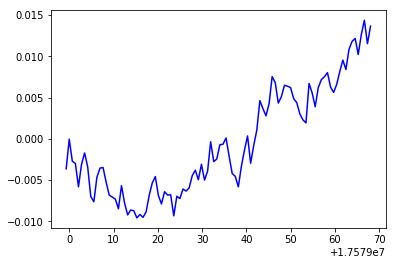

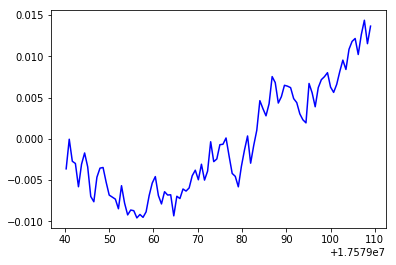

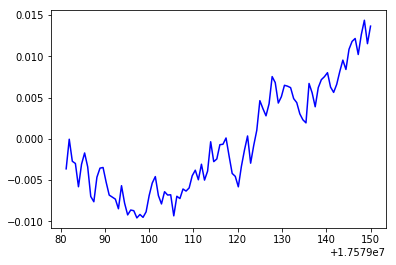

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt

sequence_length_limit = 100
for symbol in selected_symbols:
    x = dict_symbol_timestamps[symbol][:sequence_length_limit]
    y = dict_symbol_diff[symbol][:sequence_length_limit]

    x_per_day = [x_datum / float(24 * 3600) for x_datum in x]
    plt.plot(x_per_day, y, c='blue')
    plt.show()

In [18]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

from utils import CATEGORY_20_PALETTE, get_palette_color, CATEGORY_3_DASH_PATTERNS, get_dash_pattern

fig = figure(title="", x_axis_type="datetime")
for idx, symbol in enumerate(selected_symbols):
    x = dict_symbol_timestamps[symbol]
    y = dict_symbol_diff[symbol]
    fig.line(x, y, line_width=3, legend=symbol, line_dash=get_dash_pattern(idx), color=get_palette_color(idx))
show(gridplot([[fig]], plot_width=int(1262 * 0.55), plot_height=int(780 * 0.55)))
output_file("./graph_features.html", title="")

/usr/local/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 74882), ('y', 74941)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/usr/local/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 74823), ('y', 74941)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
